# OneHotEncoding

In [1]:
import pandas as pd

# Create data
data = pd.DataFrame([['Apple', 95],
                    ['Chicken', 231],
                    ['Broccoli', 50]],
                   columns= ['Food_Name', 'Calories'])
# Print data
display(data)

# One hot encoding
data_1 = pd.get_dummies(data, columns=['Food_Name'])
display(data_1)



,Food_Name,Calories
0,Apple,95
1,Chicken,231
2,Broccoli,50


,Calories,Food_Name_Apple,Food_Name_Broccoli,Food_Name_Chicken
0,95,1,0,0
1,231,0,0,1
2,50,0,1,0


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge  number of categorical variables
'''

columns = sorted(data['Food_Name'].unique())
print(f'Food_Name labels: {columns}')

enc_arr = enc.fit_transform(data[['Food_Name']]).toarray()
enc_data = pd.DataFrame(enc_arr, columns=columns).astype(int)
New_df=data.join(enc_data).drop(['Food_Name'], axis=1)
 
print(New_df)

Food_Name labels: ['Apple', 'Broccoli', 'Chicken']
   Calories  Apple  Broccoli  Chicken
0        95      1         0        0
1       231      0         0        1
2        50      0         1        0


## Work With Real Time Data

In [ ]:
Data link:
    
    https://www.kaggle.com/komalkhetlani/nutritional-content-of-cereals
    
Ref link:
    
    https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
        

Packages:
    
    import pandas as pd
    rslt = pd.get_dummies(data, columns=[clm_1, clm_2])


### 1. Data Loading

In [36]:

import pandas as pd

# Loading Data
data = pd.read_csv('E:/DS/DataScience/Dealing_With_categorical_Data/data/Nutritional_Content_of_Cereals/cereal.csv')
display(data.head())


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


### 2. Drop First Row

In [37]:

# Droping 0 index row, because we can see data types mentioned in 0th row.
data.drop(0, inplace= True)
# Rearrainge the index numbers after droping.
data.reset_index(drop=True, inplace=True)
display(data.head())

data.dropna(inplace=True)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


### 3. Observe Data Types

In [38]:
print(data.dtypes)

name        object
mfr         object
type        object
calories    object
protein     object
fat         object
sodium      object
fiber       object
carbo       object
sugars      object
potass      object
vitamins    object
shelf       object
weight      object
cups        object
rating      object
dtype: object


### 4. Select Required Data

In [ ]:
Note:
    We observe that data have two categorical features.
    1. mfr   --------> Where it is manufacturing.
    2. type  --------> Is it Hot or cold product.
    
1. mfr (manufacturer):
    
    A = American Home Food Products, 
    G = General Mills, 
    K = Kelloggs, 
    N = Nabisco, 
    P = Post, 
    Q = Quaker Oats
    
2. Type:
    
    C = Cold
    H = Hot

In [39]:

ctgl_data = data.loc[:, ['mfr', 'type']]
display(ctgl_data)


,mfr,type
0,N,C
1,Q,C
2,K,C
3,K,C
4,R,C
...,...,...
72,G,C
73,G,C
74,R,C
75,G,C


## OneHotEncoding

In [40]:
import pandas as pd

rslt = pd.get_dummies(data, columns=['mfr', 'type'])

display(data)
display(rslt)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,39.106174
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1,27.753301
74,Wheat Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1,51.592193


,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,100% Bran,70,4,1,130,10,5,6,280,25,...,68.402973,0,0,0,1,0,0,0,1,0
1,100% Natural Bran,120,3,5,15,2,8,8,135,0,...,33.983679,0,0,0,0,0,1,0,1,0
2,All-Bran,70,4,1,260,9,7,5,320,25,...,59.425505,0,0,1,0,0,0,0,1,0
3,All-Bran with Extra Fiber,50,4,0,140,14,8,0,330,25,...,93.704912,0,0,1,0,0,0,0,1,0
4,Almond Delight,110,2,2,200,1,14,8,-1,25,...,34.384843,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0,21,3,60,25,...,39.106174,0,1,0,0,0,0,0,1,0
73,Trix,110,1,1,140,0,13,12,25,25,...,27.753301,0,1,0,0,0,0,0,1,0
74,Wheat Chex,100,3,1,230,3,17,3,115,25,...,49.787445,0,0,0,0,0,0,1,1,0
75,Wheaties,100,3,1,200,3,17,3,110,25,...,51.592193,0,1,0,0,0,0,0,1,0


## Multicorrilation Problem

In [41]:
print(rslt.columns)

Index(['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'mfr_A', 'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H'],
      dtype='object')


In [56]:
import statsmodels.api as sm
import numpy as np

x = rslt.iloc[:, 2:]
y = rslt['calories']

x = sm.add_constant(x)


#x = np.asanyarray(x)

display(type(x))
display(type(y))

pandas.core.frame.DataFrame

pandas.core.series.Series

In [57]:
model = sm.OLS(y.astype('float'), x.astype('float')).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.878e+14
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:40:24   Log-Likelihood:                 905.26
No. Observations:                  74   AIC:                            -1771.
Df Residuals:                      54   BIC:                            -1724.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.1136   6.09e-06   2.46e+07      0.000     150.114     150.114
protein       14.6961   6.39e-07    2.3e+07      0.000      14.696      14.696
fat           -7.5942   6.06e-07  -1.25e+07      0.000      -7.594      -7.594
sodium        -0.2447   1.09e-08  -2.25e+07      0.000      -0.245      -0.245
fiber         15.4607   7.91e-07   1.96e+07      0.000      15.461      15.461
carbo          4.9049   2.28e-07   2.15e+07      0.000       4.905       4.905
sugars        -3.2547   1.82e-07  -1.79e+07      0.000      -3.255      -3.255
potass        -0.1526   8.99e-09   -1.7e+07      0.000      -0.153      -0.153
vitamins      -0.2299   1.34e-08  -1.71e+07      0.000      -0.230      -0.230
shelf      -1.998e-07   2.63e-07     -0.760      0.450   -7.27e-07    3.27e-07
weight      4.224e-06    5.1e-06      0.829      0.411   -5.99e-06    1.44e-05
cups        5.839e-07   9.34e-07      0.625      0.535   -1.29e-06    2.46e-06
rating        -4.4899   1.85e-07  -2.43e+07      0.000      -4.490      -4.490
mfr_A         21.4448   2.08e-06   1.03e+07      0.000      21.445      21.445
mfr_G         21.4448   1.07e-06   2.01e+07      0.000      21.445      21.445
mfr_K         21.4448   9.37e-07   2.29e+07      0.000      21.445      21.445
mfr_N         21.4448   1.13e-06   1.89e+07      0.000      21.445      21.445
mfr_P         21.4448   9.28e-07   2.31e+07      0.000      21.445      21.445
mfr_Q         21.4448   1.11e-06   1.94e+07      0.000      21.445      21.445
mfr_R         21.4448   1.17e-06   1.83e+07      0.000      21.445      21.445
type_C        75.0568   3.04e-06   2.47e+07      0.000      75.057      75.057
type_H        75.0568   3.27e-06    2.3e+07      0.000      75.057      75.057
==============================================================================
Omnibus:                        2.279   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.479
Skew:                          -0.044   Prob(JB):                        0.477
Kurtosis:                       2.313   Cond. No.                     3.86e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
x.iloc[:, 1:].corr()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
mfr_A,1.000000,-0.076129,-0.078599,-0.034766,-0.040748,-0.040748,-0.034766,-0.569386,0.569386
mfr_G,-0.076129,1.000000,-0.436806,-0.193211,-0.226455,-0.226455,-0.193211,0.133703,-0.133703
mfr_K,-0.078599,-0.436806,1.000000,-0.199480,-0.233804,-0.233804,-0.199480,0.138042,-0.138042
mfr_N,-0.034766,-0.193211,-0.199480,1.000000,-0.103418,-0.103418,-0.088235,-0.189963,0.189963
mfr_P,-0.040748,-0.226455,-0.233804,-0.103418,1.000000,-0.121212,-0.103418,0.071566,-0.071566
mfr_Q,-0.040748,-0.226455,-0.233804,-0.103418,-0.121212,1.000000,-0.103418,-0.149095,0.149095
mfr_R,-0.034766,-0.193211,-0.199480,-0.088235,-0.103418,-0.103418,1.000000,0.061059,-0.061059
type_C,-0.569386,0.133703,0.138042,-0.189963,0.071566,-0.149095,0.061059,1.000000,-1.000000
type_H,0.569386,-0.133703,-0.138042,0.189963,-0.071566,0.149095,-0.061059,-1.000000,1.000000


TypeError: Image data of dtype object cannot be converted to float

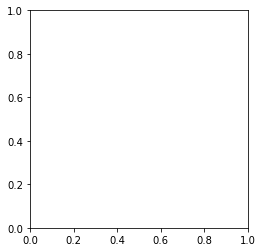

In [68]:
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap( x.iloc[:, 1:] , linewidth = 0.5 , cmap = 'coolwarm' )
plt.imshow( x.iloc[:, 1:] , cmap = 'autumn' , interpolation = 'nearest' )
plt.show()